<a href="https://colab.research.google.com/github/Ankan05/GitLearningRepo/blob/master/COVIRAP_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,plot_confusion_matrix

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

# Preparing train-validation-test dataset

In [2]:
data = pd.read_csv("data_new_without_abs.csv")

In [3]:
#sns.pairplot(data)

In [4]:
# from scipy.stats import boxcox
# from scipy.special import inv_boxcox

# data_boxcox = data.copy()



# to_convert = [i if i!=0 else 1 for i in data_boxcox["b Diff"].values]
# data_boxcox["b Diff"], fitted_lambda= boxcox(to_convert,  lmbda=None)
# inv_boxcox(data_boxcox["b Diff"], fitted_lambda)
# # data_boxcox["b Diff"].hist()

# to_convert = [i if i!=0 else 1 for i in data_boxcox["g Diff"].values]
# data_boxcox["g Diff"], fitted_lambda= boxcox(to_convert,  lmbda=None)
# inv_boxcox(data_boxcox["g Diff"], fitted_lambda)
# # data_boxcox["g Diff"].hist()

# to_convert = [i if i!=0 else 1 for i in data_boxcox["r Diff"].values]
# data_boxcox["r Diff"], fitted_lambda= boxcox(to_convert,  lmbda=None)
# inv_boxcox(data_boxcox["r Diff"], fitted_lambda)
# # data_boxcox["r Diff"].hist()

# to_convert = [i if i!=0 else 1 for i in data_boxcox["b after"].values]
# data_boxcox["b after"], fitted_lambda= boxcox(to_convert,  lmbda=None)
# inv_boxcox(data_boxcox["b after"], fitted_lambda)
# # data_boxcox["b after"].hist()


# to_convert = [i if i!=0 else 1 for i in data_boxcox["g after"].values]
# data_boxcox["g after"], fitted_lambda= boxcox(to_convert, lmbda=None)
# inv_boxcox(data_boxcox["g after"], fitted_lambda)
# # data_boxcox["g after"].hist()


# to_convert = [i if i!=0 else 1 for i in data_boxcox["r after"].values]
# data_boxcox["r after"], fitted_lambda= boxcox(to_convert, lmbda=None)
# inv_boxcox(data_boxcox["r after"], fitted_lambda)
# # data_boxcox["r after"].hist()



# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff ANC b"].values]
# data_boxcox["Diff ANC b"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff ANC b"],fitted_lambda)
# # data_boxcox["Diff ANC b"].hist()
# # plt.show()


# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff ANC g"].values]
# data_boxcox["Diff ANC g"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff ANC g"],fitted_lambda)
# # data_boxcox["Diff ANC g"].hist()
# # plt.show()


# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff ANC r"].values]
# data_boxcox["Diff ANC r"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff ANC r"],fitted_lambda)
# # data_boxcox["Diff ANC r"].hist()
# # plt.show()

# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff APC b"].values]
# data_boxcox["Diff APC b"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff APC b"],fitted_lambda)
# # data_boxcox["Diff APC b"].hist()
# # plt.show()

# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff APC g"].values]
# data_boxcox["Diff APC g"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff APC g"],fitted_lambda)
# # data_boxcox["Diff APC g"].hist()
# # plt.show()

# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff APC r"].values]
# data_boxcox["Diff APC r"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff APC r"],fitted_lambda)
# # data_boxcox["Diff APC r"].hist()
# # plt.show()

# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff BPC b"].values]
# data_boxcox["Diff BPC b"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff BPC b"],fitted_lambda)
# # data_boxcox["Diff BPC b"].hist()
# # plt.show()

# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff BPC g"].values]
# data_boxcox["Diff BPC g"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff BPC g"],fitted_lambda)
# # data_boxcox["Diff BPC g"].hist()
# # plt.show()

# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff BPC r"].values]
# data_boxcox["Diff BPC r"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff BPC r"],fitted_lambda)
# # data_boxcox["Diff BPC r"].hist()
# # plt.show()

# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff BNC b"].values]
# data_boxcox["Diff BNC b"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff BNC b"],fitted_lambda)
# # data_boxcox["Diff BNC b"].hist()
# # plt.show()


# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff BNC g"].values]
# data_boxcox["Diff BNC g"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff BNC g"],fitted_lambda)
# # data_boxcox["Diff BNC g"].hist()
# # plt.show()


# to_convert = [i if i!=0 else 1 for i in data_boxcox["Diff BNC r"].values]
# data_boxcox["Diff BNC r"],fitted_lambda= boxcox(to_convert,lmbda=None)
# inv_boxcox(data_boxcox["Diff BNC r"],fitted_lambda)
# # data_boxcox["Diff BNC r"].hist()
# # plt.show()

In [5]:
X = data.drop(["Result"],axis=1)
Y = data["Result"]
X_train_val,X_test_orig,y_train_val,y_test_orig =train_test_split(X,Y,test_size=0.40,random_state=0,stratify=Y)
X_train_orig,X_val_orig,y_train_orig,y_val_orig =train_test_split(X_train_val,y_train_val,test_size=0.25,random_state=0,stratify=y_train_val)
print('training :->',len(X_train_orig),';','validation :->',len(X_val_orig),';','testing :->',len(X_test_orig))

training :-> 444 ; validation :-> 148 ; testing :-> 396


In [6]:
data_train = X_train_orig.copy()
data_train['Result']=y_train_orig
data_train.to_csv('train.csv')

data_val = X_val_orig.copy()
data_val['Result']=y_val_orig
data_val.to_csv('val.csv')

data_test = X_test_orig.copy()
data_test['Result']=y_test_orig
data_test.to_csv('test.csv')

# Loading training, validation and test dataset


In [7]:
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")

Count of Negative class:  340
Count of Positive class:  104


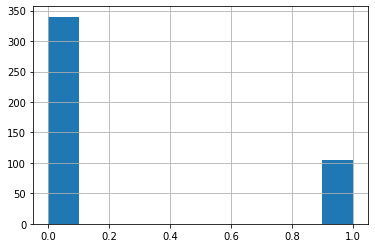

In [8]:
print("Count of Negative class: ",list(train["Result"]).count(0))
print("Count of Positive class: ",list(train["Result"]).count(1))
train["Result"].hist()

# Upsampling the training dataset




In [9]:
data_bal = train.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.Result==0]
df_minority = data_bal[data_bal.Result==1]

# df_majority_downsampled = resample(df_majority,replace=True,n_samples=list(train["Result"]).count(1),random_state=123)
# df_downsampled = pd.concat([df_majority_downsampled,df_minority])
# print("downsampled data:->\n",df_downsampled.Result.value_counts())

# #Here we are upsampling the Minority Class Data Points. 
# #i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=list(train["Result"]).count(0),random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data:->\n",df_upsampled.Result.value_counts())

Upsampled data:->
 1    340
0    340
Name: Result, dtype: int64


# Testing on different classifiers

In [10]:
# X_train = df_upsampled.drop(["Result"],axis=1)
# Y_train = df_upsampled["Result"]
# X_val = val.drop(["Result"],axis=1)
# Y_val = val["Result"]

X_train = df_upsampled.drop(["Result","r after","Diff ANC r","Diff APC r","Diff BNC b","Diff BNC g","Diff BNC r","Diff BPC b","Diff BPC r"],axis=1)
Y_train = df_upsampled["Result"]
X_val = val.drop(["Result","r after","Diff ANC r","Diff APC r","Diff BNC b","Diff BNC g","Diff BNC r","Diff BPC b","Diff BPC r"],axis=1)
Y_val = val["Result"]

models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,Y_train)
Y_pred = ensemble.predict(X_val) 
print(classification_report(Y_pred,Y_val))
print("Voting Ensemble:>",accuracy_score(Y_pred,Y_val))



# SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
# SVM.fit(X_train,Y_train)
# Y_pred = SVM.predict(X_val)
# print(classification_report(Y_pred,Y_val))
# print("SVM:>",accuracy_score(Y_pred,Y_val))


XGBC = XGBClassifier(learning_rate =0.1, n_estimators=100000, max_depth=7, min_child_weight=0.1, gamma=0, subsample=0.6, colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,Y_train)
Y_pred = XGBC.predict(X_val)
print(classification_report(Y_pred,Y_val))
print("XGBoost:>",accuracy_score(Y_pred,Y_val))


RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,class_weight="balanced",bootstrap=True)
RF.fit(X_train,Y_train)
Y_pred = RF.predict(X_val)
print(classification_report(Y_pred,Y_val))
print("RandomForestClassifier:>",accuracy_score(Y_pred,Y_val))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,Y_train)
Y_pred = Model2.predict(X_val)
print(classification_report(Y_pred,Y_val))
print("GradientBoostingClassifier:>",accuracy_score(Y_pred,Y_val))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,Y_train)
Y_pred = Model3.predict(X_val)
print(classification_report(Y_pred,Y_val))
print("DecisionTreeClassifier:>",accuracy_score(Y_pred,Y_val))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,Y_train)
Y_pred = Model4.predict(X_val)
print(classification_report(Y_pred,Y_val))
print("AdaBoostClassifier:>",accuracy_score(Y_pred,Y_val))
val

Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,Y_train)
Y_pred = Model5.predict(X_val)
print(classification_report(Y_pred,Y_val))
print("LinearDiscriminantAnalysis:>",accuracy_score(Y_pred,Y_val))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,Y_train)
Y_pred = KNN.predict(X_val)
print(classification_report(Y_pred,Y_val))
print("KNeighborsClassifier:>",accuracy_score(Y_pred,Y_val))


Model7 = GaussianNB()
Model7.fit(X_train,Y_train)
Y_pred = Model7.predict(X_val)
print(classification_report(Y_pred,Y_val))
print("GaussianNB:>",accuracy_score(Y_pred,Y_val))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,Y_train)
Y_pred = Model8.predict(X_val)
print(classification_report(Y_pred,Y_val))
print("Logistic Regression:>",accuracy_score(Y_pred,Y_val))


              precision    recall  f1-score   support

           0       0.86      0.91      0.88       107
           1       0.71      0.61      0.66        41

    accuracy                           0.82       148
   macro avg       0.79      0.76      0.77       148
weighted avg       0.82      0.82      0.82       148

Voting Ensemble:> 0.8243243243243243
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       111
           1       0.69      0.65      0.67        37

    accuracy                           0.84       148
   macro avg       0.79      0.77      0.78       148
weighted avg       0.84      0.84      0.84       148

XGBoost:> 0.8378378378378378
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.63      0.58      0.60        38

    accuracy                           0.80       148
   macro avg       0.74      0.73      0.74       148
weighted

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.95      0.91       103
           1       0.86      0.67      0.75        45

    accuracy                           0.86       148
   macro avg       0.86      0.81      0.83       148
weighted avg       0.86      0.86      0.86       148

AdaBoostClassifier:> 0.8648648648648649
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        95
           1       0.83      0.55      0.66        53

    accuracy                           0.80       148
   macro avg       0.81      0.74      0.76       148
weighted avg       0.80      0.80      0.79       148

LinearDiscriminantAnalysis:> 0.7972972972972973
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        92
           1       0.77      0.48      0.59        56

    accuracy                           0.75       148
   macro avg       0.76      0.70      0

 # Testing on the test dataset




              precision    recall  f1-score   support

           0       0.86      0.91      0.88       288
           1       0.71      0.61      0.66       108

    accuracy                           0.83       396
   macro avg       0.79      0.76      0.77       396
weighted avg       0.82      0.83      0.82       396

RandomForestClassifier:> 0.8257575757575758
[[261  27]
 [ 42  66]]


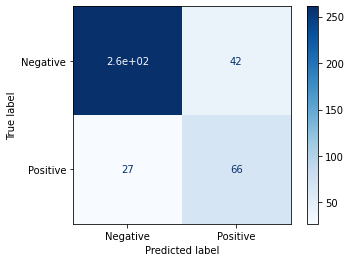

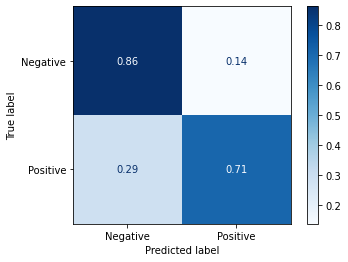

In [11]:
# X_train = train.drop(["Result"],axis=1)
# Y_train = train["Result"]
# X_test = test.drop(["Result"],axis=1)
# Y_test = test["Result"]


X_train = df_upsampled.drop(["Result","r after","Diff ANC r","Diff APC r","Diff BNC b","Diff BNC g","Diff BNC r","Diff BPC b","Diff BPC r"],axis=1)
Y_train = df_upsampled["Result"]
X_test = test.drop(["Result","r after","Diff ANC r","Diff APC r","Diff BNC b","Diff BNC g","Diff BNC r","Diff BPC b","Diff BPC r"],axis=1)
Y_test = test["Result"]


#XGBR = XGBClassifier(learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 #reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

#XGBR.fit(X_train,Y_train)

#Y_pred = XGBR.predict(X_test)

#print(classification_report(Y_pred,Y_test))

#print("accuracy_score:->",accuracy_score(Y_pred,Y_test))

#print(confusion_matrix(Y_pred,Y_test))


RF = RandomForestClassifier(n_estimators=80,random_state=0,n_jobs=1000,max_depth=100,class_weight="balanced",bootstrap=True)
RF.fit(X_train,Y_train)
Y_pred = RF.predict(X_test)
print(classification_report(Y_pred,Y_test))
print("RandomForestClassifier:>",accuracy_score(Y_pred,Y_test))
print(confusion_matrix(Y_pred,Y_test))


# Model2 = GradientBoostingClassifier(random_state=0)
# Model2.fit(X_train,Y_train)
# Y_pred = Model2.predict(X_test)
# print(classification_report(Y_pred,Y_test))
# print(classification_report(Y_pred,Y_test))
# print("GradientBoostingClassifier:>",accuracy_score(Y_pred,Y_test))



plot_confusion_matrix(RF,X_test,Y_test,display_labels=["Negative","Positive"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,Y_test,display_labels=["Negative","Positive"],cmap=plt.cm.Blues,normalize='true')

In [12]:

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.14473684210526316, 1: 0.8552631578947368}}


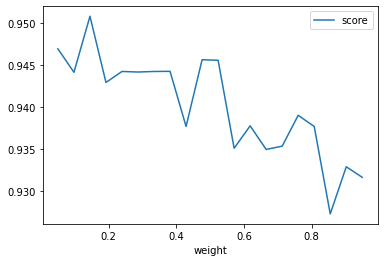

In [13]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data_out.plot(x='weight')

In [14]:
#data_out

In [15]:
X_train = train.drop(["Result","r after","Diff ANC r","Diff APC r","Diff BNC b","Diff BNC g","Diff BNC r","Diff BPC b","Diff BPC r"],axis=1)
Y_train = train["Result"]
X_test = test.drop(["Result","r after","Diff ANC r","Diff APC r","Diff BNC b","Diff BNC g","Diff BNC r","Diff BPC b","Diff BPC r"],axis=1)
Y_test = test["Result"]
clf =RandomForestClassifier(**grid_result.best_params_).fit(X_train, Y_train)

In [16]:
Y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       314
           1       0.58      0.66      0.62        82

    accuracy                           0.83       396
   macro avg       0.74      0.77      0.75       396
weighted avg       0.84      0.83      0.83       396

RandomForestClassifier:> 0.8308080808080808
[[275  39]
 [ 28  54]]


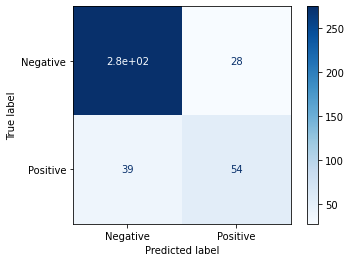

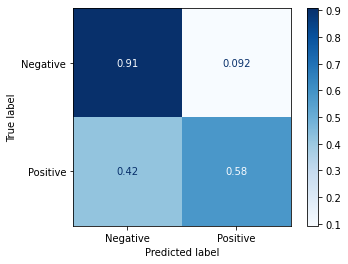

In [17]:
print(classification_report(Y_pred,Y_test))
print("RandomForestClassifier:>",accuracy_score(Y_pred,Y_test))
print(confusion_matrix(Y_pred,Y_test))
plot_confusion_matrix(clf,X_test,Y_test,display_labels=["Negative","Positive"],cmap=plt.cm.Blues)
plot_confusion_matrix(clf,X_test,Y_test,display_labels=["Negative","Positive"],cmap=plt.cm.Blues,normalize='true')